In [20]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

In [3]:
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

In [28]:
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

#print(W)
#print(b)

In [29]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [22]:
#print(tf.get_default_graph().as_graph_def())

In [30]:
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

#print(sess.run([W, b]))

In [25]:
for step in range(201):
    sess.run(train)
    
#print(sess.run([W, b]))

(0, 1.0)

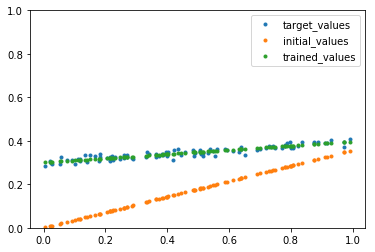

In [21]:
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, sess.run(y), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)